In [1]:
import volume_finder
import MDAnalysis as mda
import trimesh
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

/Users/danielevans/Desktop/work/lau/mda/mda_3p9/.venv/lib/python3.9/site-packages/MDAnalysis/coordinates/TRJ.py:1209: DeprecationWarning: Please use `netcdf_file` from the `scipy.io` namespace, the `scipy.io.netcdf` namespace is deprecated.
  class NCDFPicklable(scipy.io.netcdf.netcdf_file):


In [2]:
u=mda.Universe("../../povme/test/test_omt.pdb")
prot_atoms = u.select_atoms("protein")

/Users/danielevans/Desktop/work/lau/mda/mda_3p9/.venv/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:317: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


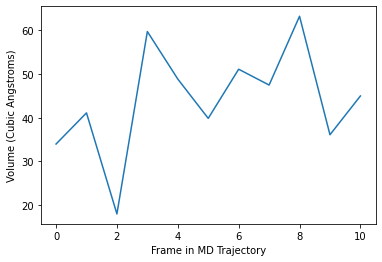

In [3]:
volumes = []
pockets = []
prots = []

grid_size = 0.5
sphere_center = [5.1972256, -3.2381766,  5.0007186]
roi_voxel = volume_finder.generate_voxelized_sphere(5, sphere_center, 0.5)
for frame in u.trajectory[0:11]:
    s = volume_finder.ProteinSurface(prot_atoms, solvent_rad=1.09, grid_size=grid_size)
    su = volume_finder.voxel_subtract(roi_voxel, s.surf)
    volumes.append(su.volume)
    pockets.append(su)
    prots.append(s)

plt.plot(volumes)
plt.xlabel("Frame in MD Trajectory")
plt.ylabel("Volume (Cubic Angstroms)")
plt.show()

In [4]:
volume_finder.show_pocket(prots[0].surf, pockets[0])

2022-07-20 11:20:24.388 Python[9902:646114] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/ns/3vj5l9t51573yvmylknzf4dw0000gn/T/org.python.python.savedState


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [5]:
pocket_edge = volume_finder.get_prot_pocket(prots[0].surf, pockets[0])
volume_finder.show_pocket(pocket_edge, pockets[0])

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [6]:
pocket_atoms, pocket = volume_finder.get_pocket_atoms(prots[0], pockets[0])
print(len(pocket_atoms))
print(pocket.volume)
volume_finder.show_pocket(pocket, pockets[0])

26
977.5000000000002


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)